Notebook prepared by Mathieu Blondel (lecture 1) and Pierre Ablin (lecture 2).

# Lecture 1

## Ridge regression

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load the Boston housing dataset.
X_boston, y_boston = load_boston(return_X_y=True)

# Split into 60% training, 20% validation and 20% test.
X_boston_tr, X_rest, y_boston_tr, y_rest = \
  train_test_split(X_boston, y_boston, test_size=0.4, random_state=0)
X_boston_val, X_boston_te, y_boston_val, y_boston_te = \
  train_test_split(X_rest, y_rest, test_size=0.5, random_state=0)

**Exercise 1.** Implement the analytical solution of ridge regression $(X^\top X + \alpha I) w = X^\top y$ (see [slides](https://data-psl.github.io/lectures2021/slides/05_optimization_linear_models)) using [scipy.linalg.solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html). Compute the solution on the training data. Make sure that the gradient at the solution is zero (up to machine precision).

In [ ]:
from scipy.linalg import solve

def ridge_regression_solution(X, y, alpha):
  # Write your function here
  return w

def ridge_regression_gradient(w, X, y, alpha):
  # Write your function here
  return gradient

w_star = ridge_regression_solution(X_boston_tr, y_boston_tr, alpha=0.1)

gradient = ridge_regression_gradient(w_star, X_boston_tr, y_boston_tr, alpha=0.1)
np.sqrt(np.sum(gradient ** 2))

1.5704672211782347e-09

**Exercise 2.** Train the models for several possible values of alpha (see below). Plot the mean squared error on the test set as a function of alpha. Use the validation data to find the best alpha and display it on the graph using a circle.

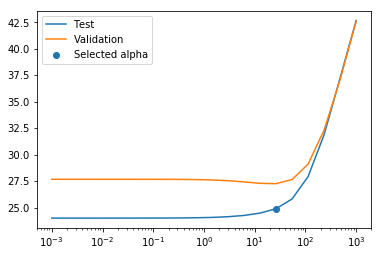

In [ ]:
alphas = np.logspace(-3, 3, 20)

**Bonus exercise.** Implement a scikit-learn compatible estimator class (with fit and predict methods). Compare that you obtain the same results as `sklearn.linear_model.Ridge(fit_intercept=False)`.

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class MyRidge(BaseEstimator, RegressorMixin):
  def __init__(self, alpha=1.0):
    self.alpha = alpha

  def fit(self, X, y):
    # Write your code here
    return self

  def predict(self, X):
    # Write your code here
    return

from sklearn.linear_model import Ridge

print(MyRidge().fit(X_boston_tr, y_boston_tr).predict(X_boston_te)[:10])
print(Ridge(fit_intercept=False).fit(X_boston_tr, y_boston_tr).predict(X_boston_te)[:10])

[29.02919442 24.23132079 22.01189693 23.33453274 27.38233833 18.17573078
 19.96559054 22.42317482 18.90765316 27.76476332]
[29.02919442 24.23132079 22.01189693 23.33453274 27.38233833 18.17573078
 19.96559054 22.42317482 18.90765316 27.76476332]


## Logistic regression

In [ ]:
from sklearn.datasets import load_iris

X_iris, y_iris = load_iris(return_X_y=True)
# Keep only two classes for this exercise.
X_iris = X_iris[y_iris <= 1]
y_iris = y_iris[y_iris <= 1]

**Exercise 3.** Make a function that computes 
$$
\text{softplus}(u) = \log(1 + e^u)
$$
and notice that its derivative is
$$
(\text{softplus}(u))' = \frac{e^u}{1 + e^u} = \frac{1}{1 + e^{-u}} = \text{sigmoid}(u).
$$
Using the finite difference formula $f'(u) \approx \frac{f(u + \epsilon) - f(u)}{\epsilon}$ where epsilon is small value (e.g. 10^-6), check that the derivative of softplus is indeed the sigmoid.

In [ ]:
import numpy as np
from scipy.special import expit as sigmoid

print(softplus(3))
print(finite_difference(softplus, 3))
print(sigmoid(3))

3.048587351573742
0.9525741493376927
0.9525741268224334


**Exercise 4.** 
Make a function that computes the likelihood
$$
\text{likelihood}(u_i, y_i) = y_i \log \text{sigmoid}(u_i) + (1-y_i) \log (1-\text{sigmoid}(u_i))
$$
where $u_i = \mathbf{w}^\top \mathbf{x}_i$.
Using
$$
\log \text{sigmoid}(u) = -\text{softplus}(-u)
$$
and
$$
\log(1 - \text{sigmoid}(u)) = -\text{softplus}(u)
$$
make a function that computes the derivative of $\text{likelihood}(u_i, y_i)$ with respect to $u_i$. Check the result by finite difference. Be careful of signs!

In [ ]:
def likelihood(u_i, y_i):
  # Write function here
  return

def likelihood_derivative(u_i, y_i):
  # Write function here
  return 
  
print(likelihood_derivative(3, 1))
print(finite_difference(likelihood, 3, 1))

0.04742587317756678
0.04742585039269054


**Exercise 5.** Write a function that implements the penalized objective function
$$
L(\mathbf{w})
= -\sum_{i=1}^n y_i \log \text{sigmoid}(\mathbf{w}^\top \mathbf{x}_i) + (1-y_i) \log (1-\text{sigmoid}(\mathbf{w}^\top \mathbf{x}_i)) + \frac{\alpha}{2} \|\mathbf{w}\|^2
$$
and another function that computes its gradient. Reuse `likelihood(u_i, y_i)` and `likelihood_derivative(u_i, y_i)` (you can use a for loop). Check that the gradient is correct using finite differences.

In [ ]:
def objective_value(w, X, y, alpha):
  # Write function here
  return

def objective_gradient(w, X, y, alpha):
  # Write function here
  return

def finite_difference_gradient(func, w, *args, eps=1e-6):
  gradient = np.zeros_like(w)
  for j in range(len(w)):
    e_j = np.zeros(len(w))
    e_j[j] = 1
    gradient[j] = (func(w + eps * e_j, *args) - func(w, *args)) / eps
  return gradient

n_samples, n_features = X_iris.shape
w = np.random.randn(n_features)
alpha = 0.1
print(objective_gradient(w, X_iris, y_iris, alpha))
print(finite_difference_gradient(objective_value, w, X_iris, y_iris, alpha))

[-10.90033253   0.78517336 -18.02812064  -6.32085999]
[-10.90018063   0.78522077 -18.02806907  -6.32085538]


**Exercise 6.** Implement gradient descent. Check that the objective value is decreasing. Plot the objective value as a function of the number of iterations.

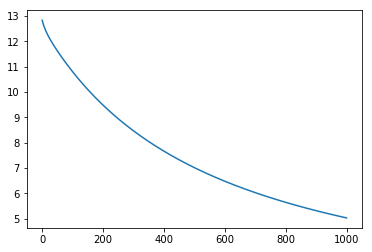

In [ ]:
def gradient_descent(value_function, gradient_function, w_init, *args, 
                     step_size=1e-4, num_iterations=1000):
  
  values = []
  w = w_init
  # Write gradient descent iteration here.
  return values

n_samples, n_features = X_iris.shape
w_init = np.random.randn(n_features)
values = gradient_descent(objective_value, objective_gradient, w, X_iris, y_iris, alpha)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(len(values)), values)
plt.show()

**Exercise 7.** Rewrite `objective_value` and `objective_gradient` without for loop. Check the correctness of your implementation against the version with a for loop.

In [ ]:
def objective_value_no_loop(w, X, y, alpha):
  # Write your code here
  return 

def objective_gradient_no_loop(w, X, y, alpha):
  # Write your code here
  return

n_samples, n_features = X_iris.shape
w = np.random.randn(n_features)
alpha = 0.1
print(objective_value(w, X_iris, y_iris, alpha))
print(objective_value_no_loop(w, X_iris, y_iris, alpha))
print(objective_gradient(w, X_iris, y_iris, alpha))
print(objective_gradient_no_loop(w, X_iris, y_iris, alpha))

496.88245421064147
496.8824542106415
[250.39537028 171.49335641  73.11263942  12.28640433]
[250.39537028 171.49335641  73.11263942  12.28640433]


Time the two implementations.

In [ ]:
%time objective_value(w, X_iris, y_iris, alpha)

CPU times: user 3.56 ms, sys: 0 ns, total: 3.56 ms
Wall time: 3.07 ms


496.88245421064147

In [ ]:
%time objective_value_no_loop(w, X_iris, y_iris, alpha)

CPU times: user 180 µs, sys: 0 ns, total: 180 µs
Wall time: 157 µs


496.8824542106415

# Lecture 2

# Stochastic gradient descent

We will focus on the Boston dataset and ridge regression. We will start by scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_boston)
y = y_boston - y_boston.mean()
y /= np.std(y_boston)

**Exercise 8.** Write a function that computes the stochastic gradient of ridge regression
$$
L(\mathbf{w}) = \frac{1}{n} \|\mathbf{y} - \mathbf{X} \mathbf{w}\|^2 
+ \frac{\alpha}{2} \|\mathbf{w}\|^2
$$
(notice the 1/n factor).

Check that the mean of the stochastic gradients gives the gradient.

In [ ]:
def ridge_objective(w, X, y, alpha):
  # Write your code here
  return 


def ridge_gradient(w, X, y, alpha):
  # Write your code here
  return

def stochastic_gradient(w, i, X, y, alpha):
  # Write your code here
  return



[ 2.74975329 -7.56607978  7.48728688 -0.47072923  7.57452968 -4.29253731
  7.01977334 -7.49821066  5.75917508  5.98113509  3.01250338 -6.24081487
  6.46236651]
[ 2.74975329 -7.56607978  7.48728688 -0.47072923  7.57452968 -4.29253731
  7.01977334 -7.49821066  5.75917508  5.98113509  3.01250338 -6.24081487
  6.46236651]


**Exercise 9.** Write a function that implements stochastic gradient descent. Implement two rules for sampling the index: cyclic, and at random. Compare the convergence of both algorithms. What is the role of the step size?

You should especially look at the convergence speed and the value at which the algorithm plateaus.

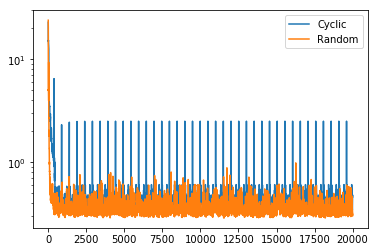

0.28869638566059846
0.2893135046292728
0.34628829521140064


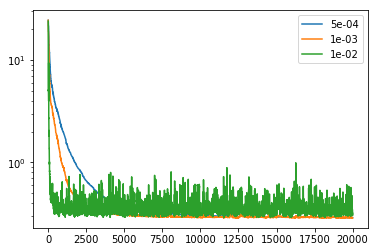

In [ ]:
def stochastic_gradient_descent(value_function, gradient_function, w_init, idx_list, *args,
                                step_size=1e-4, num_iterations=1000):
  
  values = []
  w = w_init
  # Write SGD code here
  return values



# L-BFGS

L-BFGS is the go-to second order method. It is already implemented in `scipy`:

In [ ]:
from scipy.optimize import fmin_l_bfgs_b

**Exercise 10.** Use the L-BFGS code to optimize the logistic regression on the Iris dataset. Compare it with your gradient descent.

Hint: in order to store the function values, you can use the callback function in `fmin_l_bfgs_b`. Don't forget to read the documentation !

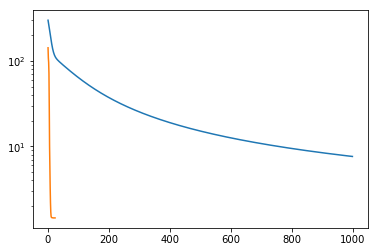

In [ ]:
class callback(object):
    def __init__(self):
        self.values = []
    
    def __call__(self, w):
        self.values.append(objective_value_no_loop(w, X_iris, y_iris, alpha))
    